<div dir=rtl>

#  פרויקט קורס סקרנות
  מגישים: שי פרח ת.ז 025257957 , 
אלון מזרחי ת.ז 312284706

<div dir=rtl>

# עבור פרויקט זה נשתמש במסד הנתונים של האירוסים לסיווג מולטי-קלאס 

<div dir=rtl>

## טעינת הספריות

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from google.colab import data_table # Enables rendering of pandas dataframes into interactive displays
data_table.enable_dataframe_formatter()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import keras


<div dir=rtl>


# ניסוח הבעיה: בחירת בעיית למידה
סיווג דאטהסט האירוסים.

<div dir=rtl>

## טעינת הנתונים 

In [ ]:
# load the dataset
path = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = read_csv(path)

<img src=https://camo.githubusercontent.com/74e378bb24b34efb63e8db09c4f073370d36f23aaa2c7580a805e93c881b78c2/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67>

The Iris Dataset consists of 50 samples each of three different species of iris flower: setosa, versicolor and virginica. It contains four different measurements for each sample in centimetres - the length and width of sepals and petals - making it a multivariate dataset.
<img src=https://miro.medium.com/max/1400/1*2vTEJYgA9TnWPM81fBz7tw.webp>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
### start part b ###

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

y_train

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2,
       0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0])

<div dir=rtl>

# חלק ב': 
## 4. פירמול הבעיה בעזרת רשת נוירונים

<div dir=rtl>


מטרת הלמידה היא אימון מודל מודל מסווג לדאטהסט האירוסים.
בדאטהסט זה כל דוגמא מכילה וקטור x בין 4 תכונות מספריות רציפות, ותיוג y, שהוא סוג האירוס הספציפי מתוך שלושה סוגי אירוסים הקיימים בדאטהסט.
 
מטרת הלמידה היא אימון רשת נוירונים בעלת ששכבת כניסה עם 4 נוירונים ( נוירון לכל תכונה), ושכבת יציאה עם 3 נוירונים (הוריון לכל סוג אירוס). 
רשת הנוירונים המאומנת תקבל כקלט וקטור  x המכיל את ארבעת התכונות המספריות של האירוס הספציפי ותחזיר כפלט וקטור בין שלושה ערכים המייצגים את ההסתברות 
</div> 
￼P(y_i |x)
  for i= 1,2,3

<div dir=rtl>

## הגדרת מבנה הרשת

רשת מסוג ,Fully Connected, בעלת 4 שכבות כאשר שלושת השכבות הראשונות עם אקטיבציית Relu ושכבה אחרונה בעלת אקטיבציית Softmax.



<div dir=rtl>

### הגדרת אלגוריתם הלמידה

אלגוריתם הלמידה הוא האלגוריתם הגנרי לרשתות נוירונים, כלומר איטרציות של:

 </div>

1.  **Backpropogation**: for computing the gradient of the loss with respect to the network parameters
2.   **Optimization**: Updating the parameter, using the compted gradient, to reduce the loss



<div dir=rtl>


## 5. תכנות הבעיה והפתרון
### תכנות רשת הנוירונים
לשם בנייה ואימון של רשת הנוירונים אנו משתמשים בספריית Keras

In [ ]:
n_features = 4
# define model
model = Sequential()
model.add(Dense(16, input_dim=n_features, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()



Model: "sequential_634"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3692 (Dense)          (None, 16)                80        
                                                                 
 dense_3693 (Dense)          (None, 8)                 136       
                                                                 
 dense_3694 (Dense)          (None, 8)                 72        
                                                                 
 dense_3695 (Dense)          (None, 3)                 27        
                                                                 
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


<div dir=rtl>

## קימפול המודל

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


<div dir=rtl>

## אימון המודל - הרצת אלגוריתם הלמידה
תהליך החילחול לאחור והאופטימיזציה נעשה בתוך פונקציית ה-fit של Keras


In [ ]:

# fit the model
model.fit(X_train, y_train, epochs=300, batch_size=X_train.shape[0])



Epoch 1/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2798 - accuracy: 0.3524
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2219 - accuracy: 0.3524
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1825 - accuracy: 0.3524
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1504 - accuracy: 0.3524
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1227 - accuracy: 0.3524
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3524
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0807 - accuracy: 0.3524
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.3524
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0490 - accuracy: 0.3524
Epoch 10/300
6/6 [==============================] - 0s 4ms/step - loss: 1.0334 - accuracy: 0.3524
Epoch 11/300
6/6 [===========

<div dir=rtl>

## בחינת המודל המאומן הראשוני

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f' Test Accuracy: {acc:.3f}  \n Loss: {loss}\n Lan(Loss): {np.log(1-acc+1e-99)}')



2/2 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9778
 Test Accuracy: 0.978  
 Loss: 0.05446479469537735
 Lan(Loss): -3.806662549374966


<div dir=rtl>

## חישוב BIC ו- AIC


AIC = n*ln(E) + 2k

BIC = n* ln(E) + k*ln(n)

Where:

  k: #of parameters

  n: # of samples in the train set

  E: Network error

In [ ]:
k = model.count_params()
n = X_train.shape[0]
E = 1-acc+1e-99
print(f"Error: {E}")
print(f"Number of paremters: {k}")
print(f"Number of samples in the train set:{n}")

AIC = n*np.log(E) + 2*k
BIC = n*np.log(E) + k*np.log(n)

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

Error: 0.02222222089767456
Number of paremters: 315
Number of samples in the train set:105
AIC: 230.30043231562854
BIC: 1066.2979426152483


<div dir=rtl>

## בחינת מודלים בעלי פרמטרים שונים

In [ ]:
def create_and_eval(n_hidden_layers, n_neurons, activation_func, optimizer):
  #Create input layer and first hidden layer
  model = Sequential([Dense(n_neurons, 
                            activation=activation_func, 
                            input_dim=X_train.shape[1])]) 

  #Create the rest of the hidden layers according to parameters
  for i in range(n_hidden_layers-1):
    model.add(Dense(n_neurons, activation=activation_func))
  
  #Create output layer  
  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',batch_size=X_train.shape[0], metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=60, verbose=0)

  #Evaluate model
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  k = model.count_params()
  n = X_train.shape[0]
  E = 1- test_acc +1e-99    #The addition of the epsilon is for preventing ln(0) in case of 100% accuracy
  AIC = n*np.log(E) + 2*k
  BIC = n*np.log(E) + k*np.log(n) 

  return test_acc, AIC, BIC 

<div dir=rtl>

### מספר שכבות שונה

In [ ]:
acc_means = []
acc_std = []
AIC_means = []
AIC_std = []
BIC_means = []
BIC_std = []

x_ = []
for j in range(15):
  acc_t = []
  AIC_t = []
  BIC_t = []
  
  for i in range(10): # For each selected parameter value we run the training 10 times
    optimizer='adam'
    activation_func = 'relu'
    acc, AIC, BIC = create_and_eval(n_hidden_layers=j+1, n_neurons=16, activation_func=activation_func, optimizer=optimizer)
    acc_t.append(acc)
    AIC_t.append(AIC)
    BIC_t.append(BIC)
    
  # model.summary()
  print(f'Test Accuracy Mean: {np.mean(acc_t):.3f}')
  print(f'Test Accuracy StD: {np.std(acc_t):.3f}')
  x_.append(j+1)
  acc_means.append(np.mean(acc_t)) 
  acc_std.append(np.std(acc_t))
  AIC_means.append(np.mean(AIC_t)) 
  AIC_std.append(np.std(AIC_t))
  BIC_means.append(np.mean(BIC_t)) 
  BIC_std.append(np.std(BIC_t))



Test Accuracy Mean: 0.787
Test Accuracy StD: 0.078
Test Accuracy Mean: 0.858
Test Accuracy StD: 0.093
Test Accuracy Mean: 0.936
Test Accuracy StD: 0.076
Test Accuracy Mean: 0.976
Test Accuracy StD: 0.032
Test Accuracy Mean: 0.971
Test Accuracy StD: 0.026
Test Accuracy Mean: 0.960
Test Accuracy StD: 0.026
Test Accuracy Mean: 0.984
Test Accuracy StD: 0.017
Test Accuracy Mean: 0.971
Test Accuracy StD: 0.026
Test Accuracy Mean: 0.967
Test Accuracy StD: 0.044
Test Accuracy Mean: 0.958
Test Accuracy StD: 0.032
Test Accuracy Mean: 0.969
Test Accuracy StD: 0.033
Test Accuracy Mean: 0.964
Test Accuracy StD: 0.046
Test Accuracy Mean: 0.944
Test Accuracy StD: 0.050
Test Accuracy Mean: 0.960
Test Accuracy StD: 0.058
Test Accuracy Mean: 0.978
Test Accuracy StD: 0.022


In [ ]:
def plot_results(means, stds, y_label, x_, x_label):

    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the accuracy values and include error bars representing the standard deviation
    ax.errorbar(x_, means, yerr=stds, fmt='o',linestyle='None',xuplims=True, xlolims=True)
    
    # Set plot labels
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    
    # Show the plot
    plt.show()

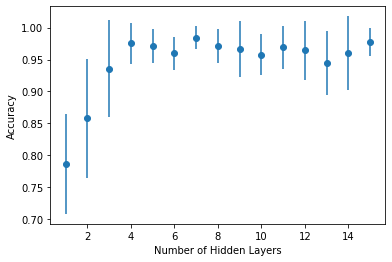

In [ ]:

plot_results(acc_means, acc_std, "Accuracy", x_, "Number of Hidden Layers")

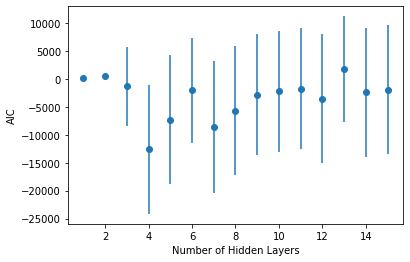

In [ ]:
plot_results(AIC_means, AIC_std, "AIC", x_, "Number of Hidden Layers")

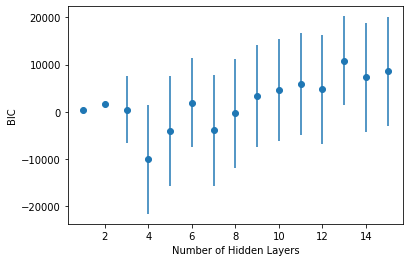

In [ ]:
plot_results(BIC_means, BIC_std, "BIC", x_, "Number of Hidden Layers")

<div dir=rtl>

####  בחירת ההיפר פרמטר על פי תוצאות המדדים של AIC/BIC

על פי התוצאות כאן ניכר שמספר השכבות הנסתרות האופטימלי הוא 4.  שכן עבור ערך זה גם הדיוק מהגבוהיים ביותר וגם מדדי הAIC ו ה=BIC הנמוכים ביותר

<div dir=rtl>

### גודל שכבות שונה


In [ ]:

acc_means = []
acc_std = []
AIC_means = []
AIC_std = []
BIC_means = []
BIC_std = []

x_ = []
for j in range(20):
  acc_t = []
  for i in range(8):
    optimizer='adam'
    activation_func = 'relu'
    acc, AIC, BIC = create_and_eval(n_hidden_layers=4, n_neurons=2*(j+1), activation_func=activation_func, optimizer=optimizer)
    acc_t.append(acc)
    AIC_t.append(AIC)
    BIC_t.append(BIC)
    
  # model.summary()
  print(f'Test Accuracy Mean: {np.mean(acc_t):.3f}')
  print(f'Test Accuracy StD: {np.std(acc_t):.3f}')

  x_.append(2*(j+1))
  acc_means.append(np.mean(acc_t)) 
  acc_std.append(np.std(acc_t))
  AIC_means.append(np.mean(AIC_t)) 
  AIC_std.append(np.std(AIC_t))
  BIC_means.append(np.mean(BIC_t)) 
  BIC_std.append(np.std(BIC_t))


Test Accuracy Mean: 0.383
Test Accuracy StD: 0.170
Test Accuracy Mean: 0.436
Test Accuracy StD: 0.179
Test Accuracy Mean: 0.625
Test Accuracy StD: 0.208
Test Accuracy Mean: 0.728
Test Accuracy StD: 0.102
Test Accuracy Mean: 0.808
Test Accuracy StD: 0.111
Test Accuracy Mean: 0.900
Test Accuracy StD: 0.094
Test Accuracy Mean: 0.992
Test Accuracy StD: 0.011
Test Accuracy Mean: 0.958
Test Accuracy StD: 0.042
Test Accuracy Mean: 0.964
Test Accuracy StD: 0.035
Test Accuracy Mean: 0.986
Test Accuracy StD: 0.015
Test Accuracy Mean: 0.975
Test Accuracy StD: 0.026
Test Accuracy Mean: 0.989
Test Accuracy StD: 0.016
Test Accuracy Mean: 0.986
Test Accuracy StD: 0.022
Test Accuracy Mean: 0.969
Test Accuracy StD: 0.029
Test Accuracy Mean: 0.989
Test Accuracy StD: 0.019
Test Accuracy Mean: 0.989
Test Accuracy StD: 0.016
Test Accuracy Mean: 0.967
Test Accuracy StD: 0.037
Test Accuracy Mean: 0.964
Test Accuracy StD: 0.029
Test Accuracy Mean: 0.983
Test Accuracy StD: 0.029
Test Accuracy Mean: 0.975
Test 

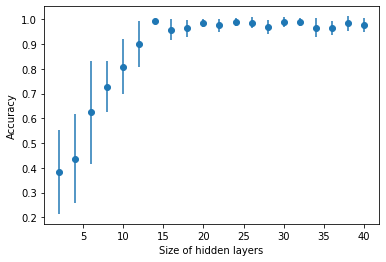

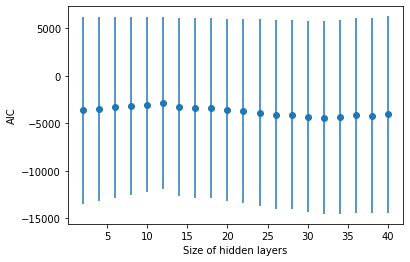

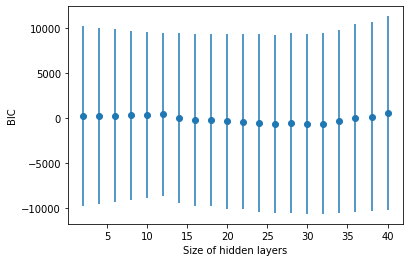

In [ ]:

plot_results(acc_means, acc_std, "Accuracy", x_, "Size of hidden layers")
plot_results(AIC_means, AIC_std, "AIC", x_, "Size of hidden layers")
plot_results(BIC_means, BIC_std, "BIC", x_, "Size of hidden layers")

<div dir=rtl>

####  בחירת ההיפר פרמטר על פי תוצאות המדדים של AIC/BIC

על פי התוצאות כאן ניכר שמספר הנוירונים האופטימלי לשכבה הוא  14.  שכן עבור ערך זה גם הדיוק הגבוה ביותר. במקרה זה מדדי הAIC ו ה=BIC לא תפסו את הבדלים הקטנים בין המודלים

<div dir=rtl>

### פונקציית אקטיבציה שונה

In [ ]:

acc_means = []
acc_std = []
x_ = []
for activation_func in ['sigmoid', 'tanh','relu','elu']:
  acc_t = []
  for i in range(8):
    optimizer='adam'
    acc, AIC, BIC = create_and_eval(n_hidden_layers=3, n_neurons=20, activation_func=activation_func, optimizer=optimizer)
    acc_t.append(acc)

  print(f'Test Accuracy Mean: {np.mean(acc_t):.3f}')
  print(f'Test Accuracy StD: {np.std(acc_t):.3f}')
  x_.append(activation_func)
  acc_means.append(np.mean(acc_t)) 
  acc_std.append(np.std(acc_t))







Test Accuracy Mean: 0.675
Test Accuracy StD: 0.015
Test Accuracy Mean: 0.986
Test Accuracy StD: 0.011
Test Accuracy Mean: 0.978
Test Accuracy StD: 0.016
Test Accuracy Mean: 0.989
Test Accuracy StD: 0.016


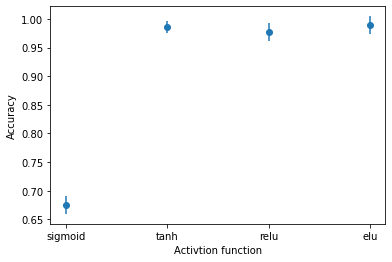

In [ ]:
plot_results(acc_means, acc_std, "Accuracy", x_, "Activtion function")

<div dir=rtl>

### אופטימייזר שונה

In [ ]:

acc_means = []
acc_std = []
x_ = []
for opt in ['adam', 'sgd','rmsprop','adamax','nadam' ]:
  acc_t = []
  for i in range(10):
    activation_func = 'relu'
    acc, AIC, BIC = create_and_eval(n_hidden_layers=3, n_neurons=24, activation_func=activation_func, optimizer=opt)
    acc_t.append(acc)

  print(f'Test Accuracy Mean: {np.mean(acc_t):.3f}')
  print(f'Test Accuracy StD: {np.std(acc_t):.3f}')
  x_.append(opt)
  acc_means.append(np.mean(acc_t)) 
  acc_std.append(np.std(acc_t))

Test Accuracy Mean: 0.973
Test Accuracy StD: 0.019
Test Accuracy Mean: 0.938
Test Accuracy StD: 0.044
Test Accuracy Mean: 0.962
Test Accuracy StD: 0.017
Test Accuracy Mean: 0.913
Test Accuracy StD: 0.085
Test Accuracy Mean: 0.978
Test Accuracy StD: 0.020


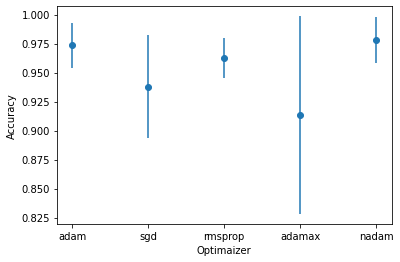

In [ ]:

plot_results(acc_means, acc_std, "Accuracy", x_, "Optimaizer")

<div dir=rtl>

## הרשת האופטימלית שקיבלנו

In [ ]:
acc_t = []
for i in range(20):
  activation_func = 'elu'
  optimizer='nadam'
  acc, AIC, BIC = create_and_eval(n_hidden_layers=4, n_neurons=14, activation_func=activation_func, optimizer=optimizer)
acc_t.append(acc)
print(f'Test Accuracy Mean: {np.mean(acc_t):.3f}')
print(f'Test Accuracy StD: {np.std(acc_t):.3f}')


Test Accuracy Mean: 1.000
Test Accuracy StD: 0.000
